# Record audio

In [ ]:
from ipywebrtc import AudioRecorder, CameraStream
import torchaudio
from IPython.display import Audio

In [ ]:
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

# Live audio analysis

In [ ]:
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
import time
from tkinter import TclError

# use this backend to display in separate Tk window
%matplotlib inline

# constants
CHUNK = 1024 * 2             # samples per frame
FORMAT = pyaudio.paInt16     # audio format (bytes per sample?)
CHANNELS = 1                 # single channel for microphone
RATE = 44100                 # samples per second
REFRESH_RATE = 0.1           # Rate of refresh of graphs in seconds

In [ ]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

## Wave display

In [ ]:
# create matplotlib figure and axes
fig, (ax, ax2) = plt.subplots(2, figsize=(20, 7))

# pyaudio class instance
p = pyaudio.PyAudio()

# stream object to get data from microphone
stream = p.open(
    format=FORMAT,
    channels=CHANNELS,
    rate=RATE,
    input=True,
    output=True,
    frames_per_buffer=CHUNK
)

# variable for plotting
x = np.arange(0, 2 * CHUNK, 2)

# create a line object with random data
line, = ax.plot(x, np.random.rand(CHUNK), '-', lw=1)

# basic formatting for the axes
ax.set_title('AUDIO WAVEFORM')
ax.set_xlabel('samples')
ax.set_ylabel('volume')
ax.set_ylim(-100, 355)
ax.set_xlim(0, 2 * CHUNK)
plt.setp(ax, xticks=[0, CHUNK, 2 * CHUNK], yticks=[0, 128, 255])
print("Display ready")

# show the plot
plt.show(block=False)
print('stream started')

while True:
    
    # binary data
    data = stream.read(CHUNK)  
    
    # convert data to integers, make np array, then offset it by 127
    data_int = struct.unpack(str(2 * CHUNK) + 'B', data)
    
    # create np array and offset by 128
    data_np = np.array([n for n in data_int], dtype='b')[::2] + 128
    data_np = smooth(data_np, 15)
    line.set_ydata(data_np)
    
    # update figure canvas
    try:
        fig.canvas.draw()
        fig.canvas.flush_events()
        frame_count += 1
        print(1)
        time.sleep(REFRESH_RATE)
        
    except:
        print('stream stopped')
        break
        
print('stream ended')

# Spectogram plotting

In [1]:
from aimpathy_constants import *
from audio_utils import smooth
import pyaudio
import struct
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import time
import math

In [59]:
REFRESH_RATE = 0.1
RATE = 44100
CHUNK = 1024 * 2
SPECTOGRAM_SECS = 2

In [87]:
y, x = np.meshgrid(np.linspace(0, RATE, RATE//10), np.linspace(0, SPECTOGRAM_SECS * 60, int((SPECTOGRAM_SECS * 60) / REFRESH_RATE)))
z = np.zeros(x.shape)
z = z[:-1, :-1]
z_min, z_max = 0, 256

In [92]:
z.shape[0]

1199

In [95]:
for i in range(z.shape[0]//2):
    z[i] = np.ones(z[i].shape)*255

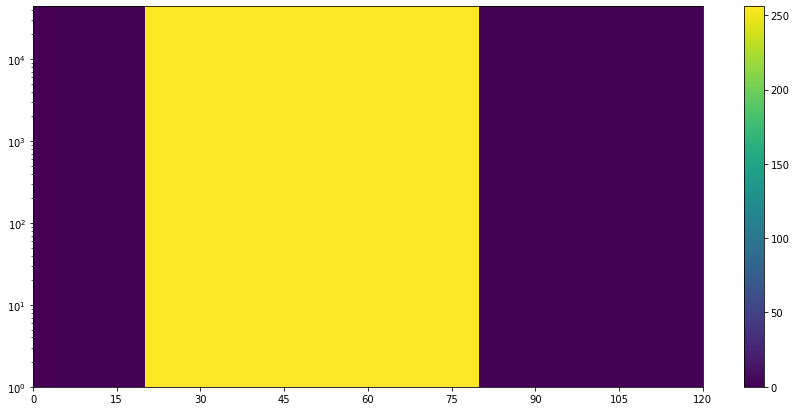

In [103]:
fig, ax_specto = plt.subplots(figsize=(15, 7))
specto_heatmap = ax_specto.pcolormesh(x, y, np.roll(z, 200, axis=0), cmap='viridis', vmin=z_min, vmax=z_max)
ax_specto.set_yscale('log')
ax_specto.set_ylim(1, RATE)
ax_specto.set_xlim(0, SPECTOGRAM_SECS * 60)
plt.setp(ax_specto, xticks=np.linspace(0, SPECTOGRAM_SECS * 60, (SPECTOGRAM_SECS * 60 // 15) + 1), yticks=[10**i for i in range(0, math.ceil(math.log(RATE, 10)))])
fig.colorbar(specto_heatmap, ax=ax_specto)
plt.show()

In [ ]:
ax_specto.set_title('Spectrogram')
ax_specto.set_xlabel('Time')
ax_specto.set_ylabel('Hz')
ax_specto.set_xlim(20, RATE / 2)

specto_x = np.linspace(0, SPECTOGRAM_SECS * 60, int((SPECTOGRAM_SECS * 60) / REFRESH_RATE))
specto_y = np.linspace(0, RATE, RATE)
specto_z = np.linspace(0, RATE, RATE)
specto_heatmap, = ax_specto.pcolormesh(specto_x, specto_y, z, cmap='RdBu', vmin=z_min, vmax=z_max)

plt.show(block=False)